In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.linear_model import LinearRegression 

In [2]:
raw = pd.read_csv('Raw_Data_2.csv')
raw

,name,Real_Gdp,Gdp_Per_Capita,democracyScore,pluralism,government,politicalParticipation,politicalCulture,civilLiberties,Population,Democratic_Status,Inflation
0,Afghanistan,2.70,2065.0,2.85,3.42,0.64,3.89,NaN,3.82,39835.428,0,5.0
1,Albania,2.24,13965.0,1.40,7.00,5.36,4.44,5.00,7.65,2872.933,0,1.4
2,Algeria,1.40,11511.0,4.01,3.08,2.86,5.00,5.00,4.12,44616.624,0,1.9
3,Angola,-2.50,6670.0,3.72,2.25,2.86,5.56,5.00,2.94,33933.610,0,17.2
4,Argentina,-2.03,22064.0,7.02,9.17,6.43,7.22,4.38,7.94,45605.826,1,25.7
...,...,...,...,...,...,...,...,...,...,...,...,...
148,United Kingdom,1.26,46659.0,8.52,9.58,7.50,8.89,7.50,9.12,68207.116,1,1.7
149,United States,2.16,62530.0,7.96,9.17,7.14,7.78,7.50,8.24,332915.073,1,1.8
150,Uruguay,2.70,21561.0,8.38,10.00,8.57,6.11,7.50,9.71,3485.151,1,7.8
151,Uzbekistan,5.30,6999.0,2.01,0.08,1.86,2.22,5.00,0.88,33935.763,0,12.5


In [3]:
cols = raw.columns.values.tolist()
Cols = ['Gdp_Per_Capita','democracyScore','pluralism','government','Population','politicalParticipation','civilLiberties','politicalCulture','Inflation']


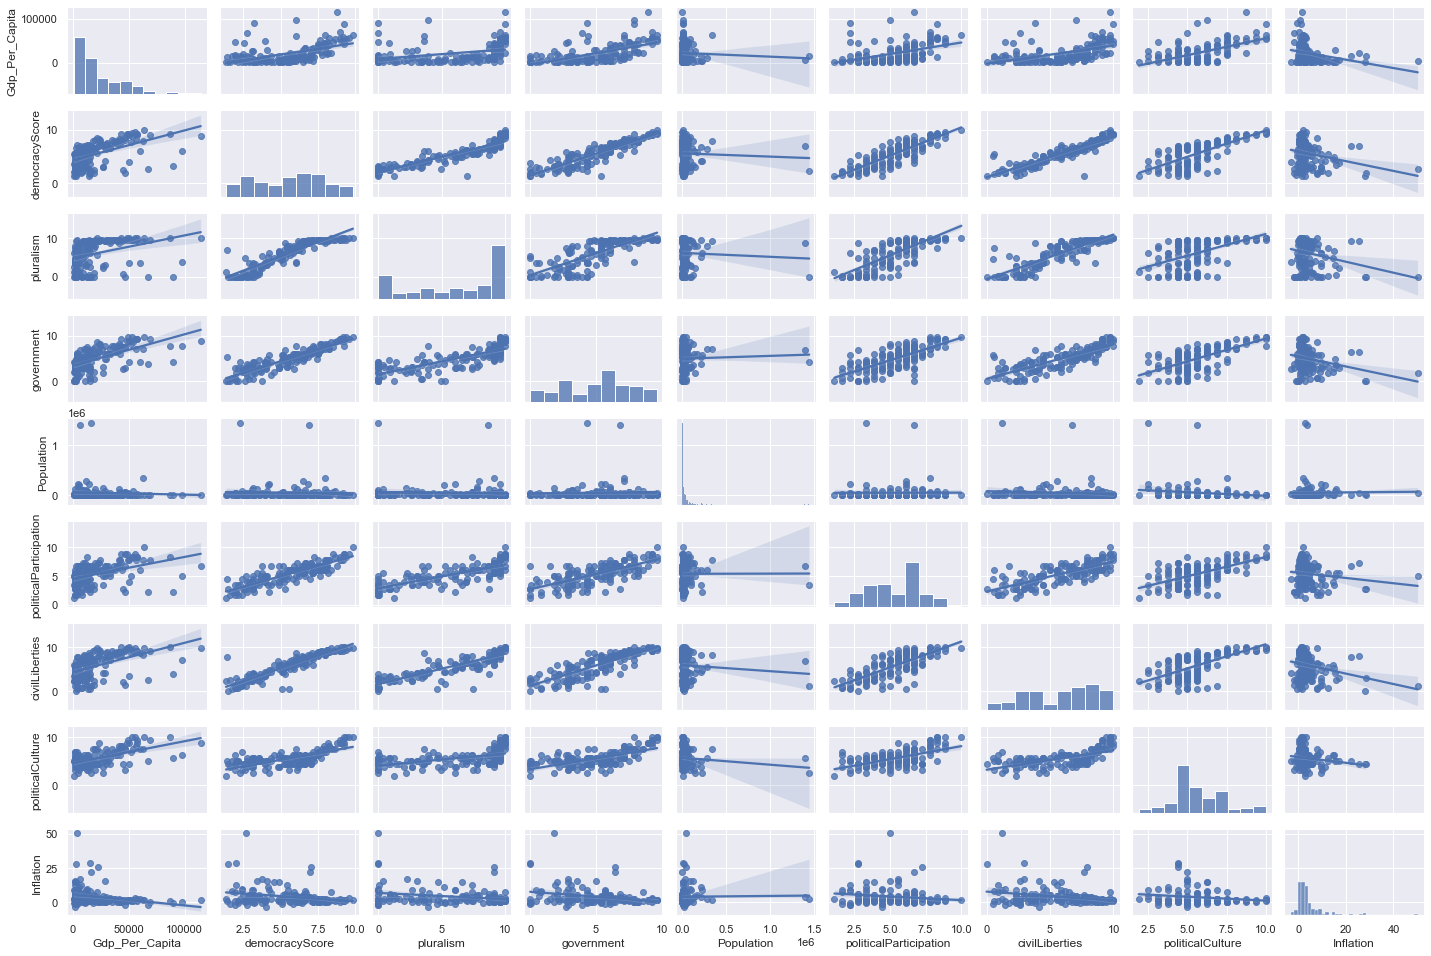

In [4]:
sns.set(color_codes = True)
sns.pairplot(raw[Cols], kind = 'reg', height = 1.5, aspect = 1.5)

In [5]:
raw = raw.dropna()
raw.shape
raw.tail(5)
raw['Inflation'] = raw['Inflation'].astype(float, errors = 'raise')

C:\Users\mekap\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


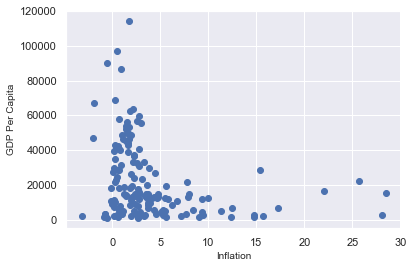

In [6]:
plt.scatter(raw['Inflation'],raw['Gdp_Per_Capita'])
plt.xlabel('Inflation', fontsize = 10)
plt.ylabel('GDP Per Capita', fontsize = 10)
plt.show()

In [7]:
def correlation(x,y):
    sx = np.std(x)## Standard deviation of LotFrontage
    sy = np.std(y)  ## Standard deviation of SalePrice
    n = raw['name'].count()
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    sigma_x = x - mean_x ## Difference between observed value and mean of LotFrontage variable
    sigma_y = y - mean_y   ## Difference between observed value and mean of SalePrice variable
   
    ## Correlation coeff = [1/(no.of observations -1)] x [1/(std.deviation 0f 2 vars)] x 
    ## ['sum of {(observed value of var1 - mean of var1) x (observed value of var2 - mean of var2)]
    
    Correlation = (1/(n-1))*(1/(sx*sy))*((sigma_x)*(sigma_y))
    print(f'\n Correlation coeff between x and y is : {Correlation.sum().round(5)}')

In [8]:
correlation(raw['Inflation'],raw['Gdp_Per_Capita'])


 Correlation coeff between x and y is : -0.29083


## Correlation coefficients B/w variables of data if Real Gdp is the Dependent variable(Y)

In [9]:
correlation = raw.corr()
tab = correlation['Gdp_Per_Capita'].sort_values(ascending = False).to_frame()
corr_matrix = sns.light_palette('Skyblue', as_cmap = True)
tb = tab.style.background_gradient(cmap=corr_matrix)
tb

,Gdp_Per_Capita
Gdp_Per_Capita,1.000000
politicalCulture,0.586637
government,0.584871
democracyScore,0.528289
civilLiberties,0.510499
Democratic_Status,0.458925
politicalParticipation,0.438746
pluralism,0.347918
Population,-0.067267
Real_Gdp,-0.103090


## Correlation Coefficients B/w variables in data if Inflation is Dependent variable(Y)

In [10]:
correlation = raw.corr()
tab = correlation['Inflation'].sort_values(ascending = False).to_frame()
corr_matrix = sns.light_palette('Skyblue', as_cmap = True)
tb = tab.style.background_gradient(cmap=corr_matrix)
tb

,Inflation
Inflation,1.000000
Real_Gdp,0.134920
Population,0.021936
politicalParticipation,-0.182576
politicalCulture,-0.186640
Democratic_Status,-0.204668
pluralism,-0.213307
civilLiberties,-0.237718
democracyScore,-0.244637
government,-0.270098


## VIF of All variables  

In [11]:
##Variance Inflation factor
c = raw.columns.values.tolist()
from statsmodels.stats.outliers_influence import variance_inflation_factor
CO = ['democracyScore','pluralism','government','Population','politicalParticipation','civilLiberties','politicalCulture','Inflation']
variables = raw[CO]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,269.408539,democracyScore
1,43.978765,pluralism
2,33.830071,government
3,1.171745,Population
4,40.045001,politicalParticipation
5,41.320232,civilLiberties
6,32.663041,politicalCulture
7,1.521225,Inflation


In [12]:
y = raw['Gdp_Per_Capita']
#raw.drop(['Gdp_Per_Capita','Real_Gdp','name','democracyScore'], axis = 1, inplace = True)
x1 = raw[['government','politicalCulture','Inflation','Population']]

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

## Anova Table depeicting the p-value and Level of significance B/w independent and Dependent Variables

In [13]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\mekap\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Gdp_Per_Capita   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     27.17
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           7.84e-17
Time:                        01:28:34   Log-Likelihood:                -1667.7
No. Observations:                 150   AIC:                             3345.
Df Residuals:                     145   BIC:                             3361.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.426e+04   5255.161     -2.714      0.007   -2.47e+04   -3877.339
government        2770.1504    772.980      3.584      0.000    1242.387    4297.914
politicalCulture  4412.3064   1127.629      3.913      0.000    2183.593    6641.020
Inflation         -581.0629    273.393     -2.125      0.035   -1121.412     -40.714
Population          -0.0035      0.008     -0.424      0.672      -0.020       0.013
==============================================================================
Omnibus:                       58.986   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.063
Skew:                           1.593   Prob(JB):                     3.90e-36
Kurtosis:                       6.992   Cond. No.                     6.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multicollinearity of Independent variables after removing democracy score and political participation

In [14]:
def MUL(c):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    variables = raw[c]
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
    vif['Features'] = variables.columns
    print(vif)
MUL(['pluralism','government','politicalCulture','civilLiberties','Inflation'])

         VIF          Features
0  21.071283         pluralism
1  20.766281        government
2  14.696061  politicalCulture
3  37.444850    civilLiberties
4   1.460932         Inflation


In [15]:
COLS = raw.columns.values
COLS

array(['name', 'Real_Gdp', 'Gdp_Per_Capita', 'democracyScore',
       'pluralism', 'government', 'politicalParticipation',
       'politicalCulture', 'civilLiberties', 'Population',
       'Democratic_Status', 'Inflation'], dtype=object)

## Dropping Civil Liberties variable

In [16]:
columns = ['Real_Gdp', 'Gdp_Per_Capita',
       'pluralism', 'government',
       'politicalCulture', 'Population',
       'Democratic_Status', 'Inflation','name']

## Final Data set(Cross sectional view) after preprocessing 

In [17]:
Data_fin = raw[columns]
Data_fin.head(30)

,Real_Gdp,Gdp_Per_Capita,pluralism,government,politicalCulture,Population,Democratic_Status,Inflation,name
1,2.24,13965.0,7.00,5.36,5.00,2872.933,0,1.4,Albania
2,1.40,11511.0,3.08,2.86,5.00,44616.624,0,1.9,Algeria
3,-2.50,6670.0,2.25,2.86,5.00,33933.610,0,17.2,Angola
4,-2.03,22064.0,9.17,6.43,4.38,45605.826,1,25.7,Argentina
5,7.50,13654.0,7.50,5.36,3.13,2968.127,0,1.4,Armenia
6,1.84,49854.0,10.00,8.93,8.75,25788.215,1,1.6,Australia
7,1.42,56188.0,9.58,7.14,8.13,9043.070,1,1.5,Austria
8,0.10,14404.0,0.50,3.21,3.75,10223.342,0,2.6,Azerbaijan
9,2.49,45011.0,0.83,2.71,4.38,1748.296,0,1.4,Bahrain
10,7.40,4754.0,7.83,6.07,4.38,166303.498,1,5.5,Bangladesh


## Converting the GDP Per Capita variable into logarithmic Values to scale its Values in Dollar amounts to that of Independent variables.
## Doing so will avoid Biasing and overfitting. 

In [18]:
log_Per_Capita = np.log(Data_fin['Gdp_Per_Capita'])
Data_fin['log_Per_Capita'] = log_Per_Capita
Data_fin

C:\Users\mekap\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Real_Gdp,Gdp_Per_Capita,pluralism,government,politicalCulture,Population,Democratic_Status,Inflation,name,log_Per_Capita
1,2.24,13965.0,7.00,5.36,5.00,2872.933,0,1.4,Albania,9.544309
2,1.40,11511.0,3.08,2.86,5.00,44616.624,0,1.9,Algeria,9.351058
3,-2.50,6670.0,2.25,2.86,5.00,33933.610,0,17.2,Angola,8.805375
4,-2.03,22064.0,9.17,6.43,4.38,45605.826,1,25.7,Argentina,10.001703
5,7.50,13654.0,7.50,5.36,3.13,2968.127,0,1.4,Armenia,9.521788
...,...,...,...,...,...,...,...,...,...,...
148,1.26,46659.0,9.58,7.50,7.50,68207.116,1,1.7,United Kingdom,10.750621
149,2.16,62530.0,9.17,7.14,7.50,332915.073,1,1.8,United States,11.043402
150,2.70,21561.0,10.00,8.57,7.50,3485.151,1,7.8,Uruguay,9.978641
151,5.30,6999.0,0.08,1.86,5.00,33935.763,0,12.5,Uzbekistan,8.853523


## OUTLIERS 

<AxesSubplot:>

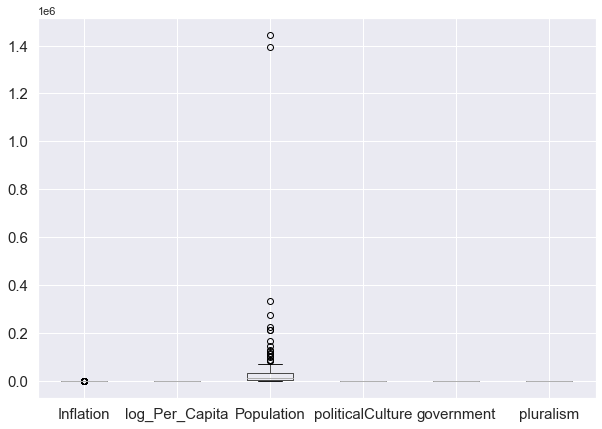

In [19]:
Data_fin.boxplot(column = ['Inflation', 'log_Per_Capita', 'Population', 'politicalCulture','government','pluralism'], fontsize = 15, figsize = (10,7))

C:\Users\mekap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Actual Distribution of GDP_Per_Capita Before Log Transform:'}, xlabel='Gdp_Per_Capita', ylabel='Density'>

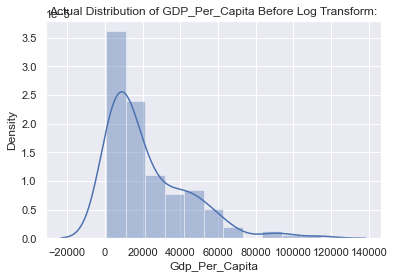

In [20]:
plt.title('Actual Distribution of GDP_Per_Capita Before Log Transform:')
sns.distplot(Data_fin['Gdp_Per_Capita'])

In [21]:
Data_fin.drop(['Real_Gdp','Democratic_Status'], axis = 1).describe(include = 'all')

,Gdp_Per_Capita,pluralism,government,politicalCulture,Population,Inflation,name,log_Per_Capita
count,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150,150.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,150,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Albania,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
mean,22367.106667,6.160533,5.072133,5.660867,4.919060e+04,3.826667,NaN,9.483270
std,21641.997901,3.540176,2.478235,1.680405,1.681354e+05,5.165030,NaN,1.142052
min,752.000000,0.000000,0.000000,1.880000,3.433530e+02,-3.200000,NaN,6.622736
25%,5443.500000,3.252500,3.105000,4.380000,4.143376e+03,0.900000,NaN,8.602131
50%,14478.000000,7.420000,5.360000,5.630000,1.016405e+04,2.350000,NaN,9.580372
75%,33152.000000,9.170000,7.052500,6.722500,3.393522e+04,4.475000,NaN,10.408852


In [22]:
targets = Data_fin['log_Per_Capita']## This will act as Y(Response) variable
inputs = Data_fin.drop(['Real_Gdp','log_Per_Capita','name','pluralism','Democratic_Status','Population'], axis = 1) ## These are Predictor Variables
inputs

,Gdp_Per_Capita,government,politicalCulture,Inflation
1,13965.0,5.36,5.00,1.4
2,11511.0,2.86,5.00,1.9
3,6670.0,2.86,5.00,17.2
4,22064.0,6.43,4.38,25.7
5,13654.0,5.36,3.13,1.4
...,...,...,...,...
148,46659.0,7.50,7.50,1.7
149,62530.0,7.14,7.50,1.8
150,21561.0,8.57,7.50,7.8
151,6999.0,1.86,5.00,12.5


## Splitting the Data set(150 rows and 158 columns) into Training and Validation

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(inputs,targets, test_size = 0.2, random_state = 5)

C:\Users\mekap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mekap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Probability distribution of Gdp Per Capita(Y-Variable) After Transform'}, xlabel='log_Per_Capita', ylabel='Density'>

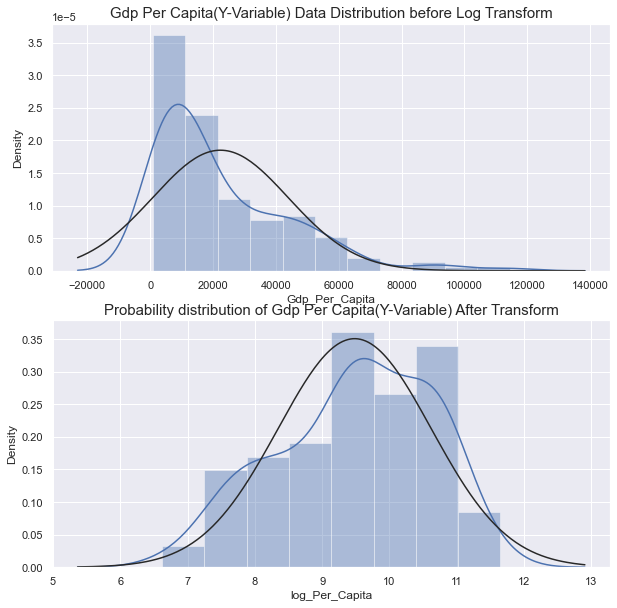

In [24]:
from scipy.stats import norm
from scipy import stats

fig = plt.figure(figsize = (10,10))

ax1 = plt.subplot2grid((2,1),(0,0))
plt.title('Gdp Per Capita(Y-Variable) Data Distribution before Log Transform', fontsize = 15)
sns.distplot(Data_fin['Gdp_Per_Capita'], fit=norm)

#target = np.log1p(target)

ax1 = plt.subplot2grid((2,1),(1,0))
plt.title('Probability distribution of Gdp Per Capita(Y-Variable) After Transform', fontsize = 15)
sns.distplot(targets, fit = norm)

reg = LinearRegression(normalize = True)
reg.fit(x_train,y_train)

In [25]:
linreg = LinearRegression(normalize = True)
linreg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [26]:
y_pred_train = linreg.predict(x_train)
y_pred_train

array([ 9.01045944,  8.7519156 ,  8.79069864,  9.11570392,  8.51440452,
        8.90551763, 10.36900292,  9.32839384,  9.14119418,  9.68179616,
        8.28760525, 10.5189473 ,  9.3024496 ,  9.18132391,  9.59535771,
       10.2950801 , 10.81144788,  9.49046842, 10.65400955,  8.02767492,
       11.30547035, 11.15231377, 10.95146179,  9.17032868,  9.41603614,
        9.00369844,  8.15925466,  8.27772612,  8.72815864,  8.65564416,
        8.8488368 ,  9.67558841,  9.75266113, 11.12578927,  8.53424613,
       10.78202577,  9.47967209,  8.69537092, 10.66640125,  9.06690305,
        8.72559971,  9.70352208,  9.16275875,  8.39515773,  9.20901025,
        8.84206543,  9.0763285 ,  8.75250431,  9.02873606,  8.4753934 ,
        9.43511954,  8.40523382,  8.11115941,  8.43538664, 10.39250314,
        7.97648158,  9.2411382 , 10.78762858,  8.70461487,  9.03473601,
        9.48611092,  9.57826012,  9.03087714,  9.35891607, 10.2938371 ,
        8.404779  ,  8.90721666, 10.30696299,  8.56231392,  8.16

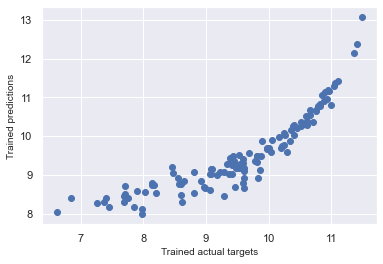

In [27]:
def scatter(x,y):
    plt.scatter(x,y)
    plt.xlabel('Trained actual targets',fontsize = 10)
    plt.ylabel('Trained predictions',fontsize = 10)
    plt.show()
scatter(y_train,y_pred_train)

In [28]:
linreg.intercept_

8.6275010423354

In [29]:
summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
summary['weights'] = linreg.coef_
summary

,Features,weights
0,Gdp_Per_Capita,0.000043
1,government,0.133203
2,politicalCulture,-0.129247
3,Inflation,-0.007494


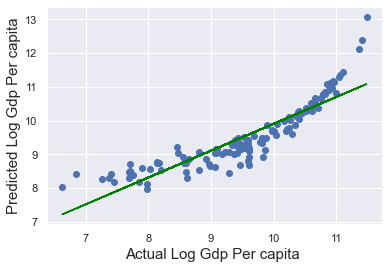

In [30]:
def verify_fit(x,y):
    plt.scatter(x,y)
    plt.xlabel('Actual Log Gdp Per capita ',fontsize = 15)
    plt.ylabel('Predicted Log Gdp Per capita',fontsize = 15)
    m, b = np.polyfit(x, y, 1)
    plt.plot(y_train, m*y_train+b, color = 'green')
verify_fit(y_train,y_pred_train)

In [31]:
from sklearn.metrics import mean_squared_error
MSE = cross_val_score(linreg, x_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_MSE = np.mean(MSE)

## Here neg_mean_squared error is selected as reference from sklearn website(Appropriate for regression problems)

print(mean_MSE)
print('\n RMSE : ', np.sqrt(-mean_MSE))

-0.3230701823788678

 RMSE :  0.5683926304755084


In [ ]:
import sklearn.model_selection as ms
from sklearn.linear_model import Ridge
import sklearn.model_selection as GridSearchCV

ridge = Ridge()
parameters = {'alpha': [x for x in range(1,500)]}

ridge_reg = ms.GridSearchCV(ridge, param_grid = parameters, scoring = 'neg_mean_squared_error', cv = 15)
ridge_reg.fit(x_train,y_train)

print('\n Best value of Alpha is : ', ridge_reg.best_params_)
print('\n Best score achieved : ', np.sqrt(-ridge_reg.best_score_))

In [ ]:
ridge_mod = Ridge(alpha = 4)
ridge_mod.fit(x_train,y_train)
y_pred_train = ridge_mod.predict(x_train)
y_pred_test = ridge_mod.predict(x_test)

print('\RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('\n RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [ ]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(n_estimators = 5000, verbosity = 1)
xg_reg = xgb.fit(x_train,y_train)
xg_predict = xg_reg.predict(x_test)

print('\n RMSE : ', np.sqrt(mean_squared_error(y_test,xg_predict)))

In [ ]:
verify_fit(y_train,y_pred_train)

In [ ]:
from mlxtend.regressor import StackingRegressor

st_reg = StackingRegressor(regressors = [ridge_mod], meta_regressor = xgb, use_features_in_secondary = True)

stack_mod = st_reg.fit(x_train,y_train)
stack_predict = stack_mod.predict(x_test)

print('\n RMSE :', np.sqrt(mean_squared_error(y_test, stack_predict)))

In [ ]:
verify_fit(y_test,stack_predict)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(x_train)
predict_ = poly.fit_transform(x_test)

clf = LinearRegression()
clf.fit(X_, y_train)
CLF = clf.predict(predict_)

In [ ]:
verify_fit(y_test, CLF)

In [ ]:
print('\n RMSE after quadratic fit :', np.sqrt(mean_squared_error(y_test, CLF)))

## T-Statistic Goodness of Fit Test for Ensemble stacking Regression, 
## XG Boost, and Linear Regression Models.

In [ ]:
def t_statistic():
    print('\n Goodness of Fit for Stacking Ensemble Model', stats.ttest_ind(y_test, stack_predict))
    print('\n Goodness of Fit for XG Boost Model', stats.ttest_ind(y_test, xg_predict))
    print('\n Goodness of Fit for Linear Regression Model', stats.ttest_ind(y_test, linreg.predict(x_test)))
t_statistic()

## Ensemble Method Predictions of GDP Per Capita


In [ ]:
np.exp(stack_predict)